## Escolha do modelo

Aqui nesse notebook testarei modelos diferentes a fim de descobrir qual é o melhor para prever os próximos preços do Bitcoin

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
df = pd.read_csv('data/bitcoin_data_processed.csv')

In [3]:
#Primeiro, irei retirar os registros com valores NaN
df = df.dropna()


In [113]:
df.head()

,timestamp,price,date,moving_avg,daily_variation,daily_variation_smooth
30,1698624000000,34556.242815,2023-10-30 00:00:00,29336.721400,0.013599,0.008614
31,1698710400000,34498.703919,2023-10-31 00:00:00,29587.682326,-0.001665,0.008494
32,1698796800000,34672.289284,2023-11-01 00:00:00,29811.174950,0.005032,0.007428
33,1698883200000,35457.454912,2023-11-02 00:00:00,30072.587951,0.022645,0.008603
34,1698969600000,34924.055450,2023-11-03 00:00:00,30322.085734,-0.015043,0.008314


## Separando dados de treino e teste

In [4]:
# Criar a variável dependente (y) e a variável independente (X)

# Exemplo: Prever o preço do dia seguinte com base no preço do dia atual

X = df[['moving_avg']].shift(1).dropna()  # Preço suavizado do dia anterior
y = df['moving_avg'].iloc[1:]  # Preço suavizado do dia atual

In [5]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Testando diferentes modelos

### 1. Regressão linear

In [136]:
#Criar o modelo
linear_model = LinearRegression()

#Treinar o modelo
linear_model.fit(X_train, y_train)

LinearRegression()

In [137]:
# Fazer previsões com o conjunto de teste
y_pred = linear_model.predict(X_test)

# Avaliar o modelo
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
rmse_linear = np.sqrt(mse_linear)

print(f'Mean Squared Error: {mse_linear}')
print(f'Root Mean Squared Error: {rmse_linear}')
print(f'R^2 Score: {r2_linear}')


Mean Squared Error: 51530.66414331688
Root Mean Squared Error: 227.0036654843196
R^2 Score: 0.9996371996089009


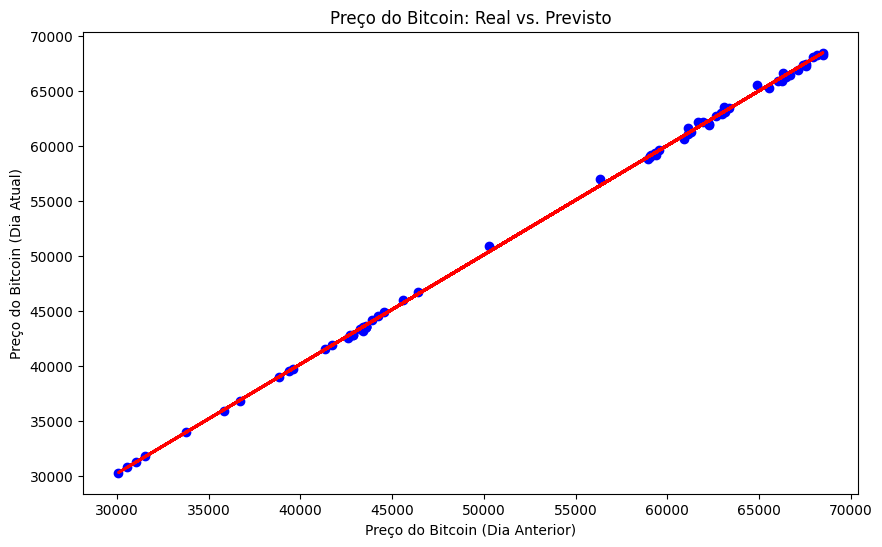

In [138]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Preço do Bitcoin: Real vs. Previsto')
plt.xlabel('Preço do Bitcoin (Dia Anterior)')
plt.ylabel('Preço do Bitcoin (Dia Atual)')
plt.show()


### Conclusões

Analisando as métricas de avaliação do modelo, fica claro que, apesar de ele conseguir se ajusar bem aos dados (talvez até demais), ele ainda erra muito. 
Avalio que isso tem a ver com a flutação dos preços que já vimos anteriormente que é muito volátil de dia para dia, o que este modelo não consegue acompanhar. <span style="color: lightgray;">(Para melhor visualização do que estou dizendo, veja o gráfico de Variação Diária presente no notebook ```exploracao.ipynb```).</span>

### 2. Random Forest

In [139]:
# Criar o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [140]:
# Fazer previsões
y_pred = rf_model.predict(X_test)

In [141]:
#Avaliar o modelo
mse_forest = mean_squared_error(y_test, y_pred)
r2_forest = r2_score(y_test, y_pred)
rmse_forest = np.sqrt(mse_forest)

print(f'Mean Squared Error: {mse_forest}')
print(f'Root Mean Squared Error: {rmse_forest}')
print(f'R^2 Score: {r2_forest}')

Mean Squared Error: 85154.73790704053
Root Mean Squared Error: 291.8128473988774
R^2 Score: 0.9994004701330707


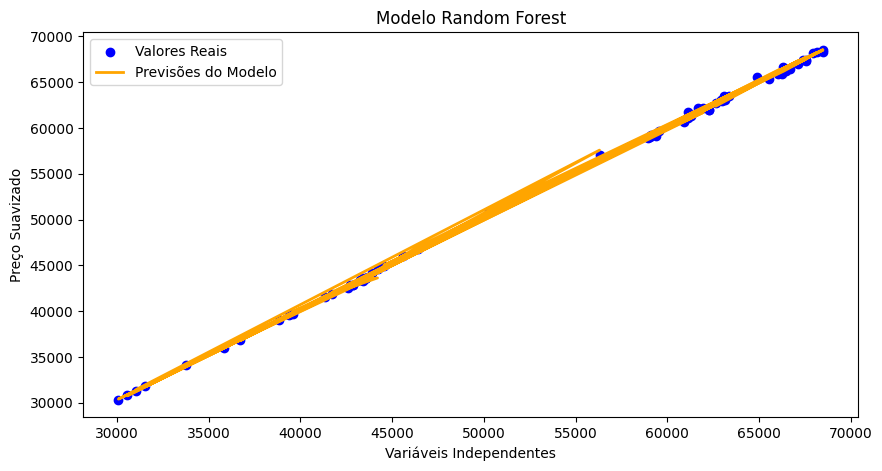

In [142]:
#Visualizar os resultados
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Valores Reais')
plt.plot(X_test, y_pred, color='orange', linewidth=2, label='Previsões do Modelo')
plt.title('Modelo Random Forest')
plt.xlabel('Variáveis Independentes')
plt.ylabel('Preço Suavizado')
plt.legend()
plt.show()

### Conclusões

O Random Forest se ajusta perfeitamente aos dados, o que sinaliza o overfitting nesse caso.

### 3. XGBoost

In [143]:
# Crie o modelo
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Treine o modelo
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [144]:
# Faça previsões
y_pred = xg_model.predict(X_test)


In [145]:
#Avaliar o modelo
mse_boost = mean_squared_error(y_test, y_pred)
r2_boost = r2_score(y_test, y_pred)
rmse_boost = np.sqrt(mse_boost)

print(f'Mean Squared Error: {mse_boost}')
print(f'Root Mean Squared Error: {rmse_boost}')
print(f'R^2 Score: {r2_boost}')

Mean Squared Error: 142258.48411119918
Root Mean Squared Error: 377.17169049545487
R^2 Score: 0.9989984325928892


### 4. ARIMA

In [64]:
train = df['price'][:-30]  # Usando todos menos os últimos 30 dias para treino
test = df['price'][-30:]    # Usando os últimos 30 dias para teste

In [103]:
# Definindo o modelo ARIMA
arima_model = sm.tsa.ARIMA(df['price'], order=(32, 1, 1))  #Utilizando os valores descobertos na exploração dos dados


c:\Users\Inteli\Documents\GitHub\Clone GitHub\Crypto-Predict\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Inteli\Documents\GitHub\Clone GitHub\Crypto-Predict\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Inteli\Documents\GitHub\Clone GitHub\Crypto-Predict\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [104]:
# Ajuste o modelo
arima_model_fit = arima_model.fit()

In [105]:
# Faça previsões
forecast = arima_model_fit.forecast(steps=30)  # Preveja os próximos 30 períodos


c:\Users\Inteli\Documents\GitHub\Clone GitHub\Crypto-Predict\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Inteli\Documents\GitHub\Clone GitHub\Crypto-Predict\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [146]:
# Calcula as métricas
mse_arima = mean_squared_error(test, forecast)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(test, forecast)

# Imprime as métricas
print(f'MSE: {mse_arima}')
print(f'RMSE: {rmse_arima}')
print(f'R²: {r2_arima}')


MSE: 40521326.87343368
RMSE: 6365.636407574162
R²: -2.5859318655270496


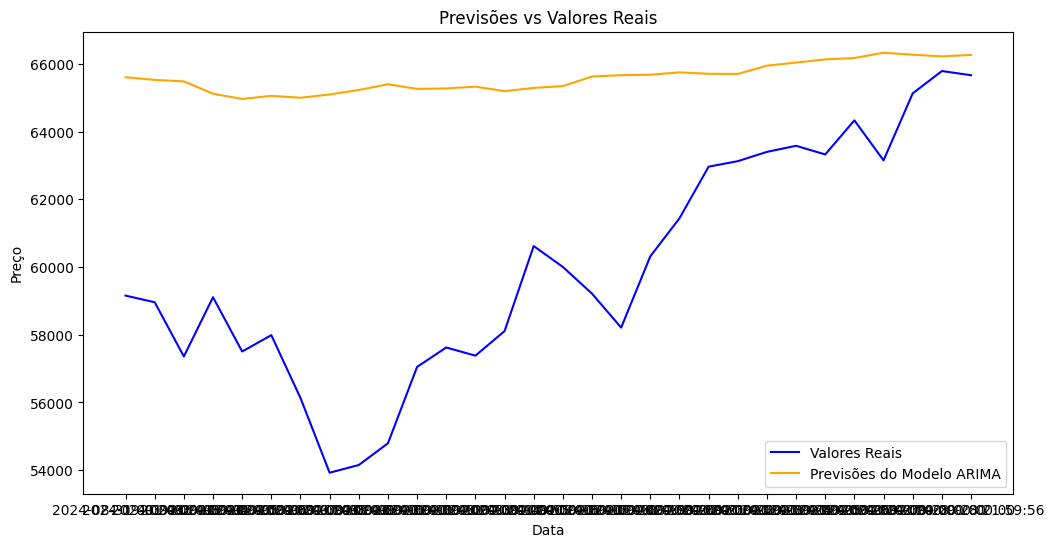

In [107]:
#Visualização dos resultados

# Gráfico das previsões vs valores reais
plt.figure(figsize=(12, 6))
plt.plot(df['date'][-len(test):], test, label='Valores Reais', color='blue')
plt.plot(df['date'][-len(test):], forecast, label='Previsões do Modelo ARIMA', color='orange')
plt.title('Previsões vs Valores Reais')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

### Conclusões 

Após testagem com vários valores de p, d e q (mesmo usando os valores obtidos após análise do **Auto-Regressive Order**, **Differencing Order** e do **Moving Average Order**), não consegui ajustar esse modelo para as predições melhor se adequar aos valores reais.
Percebi que ao aumentar o valor de p, as linhas ficavam um pouco mais parecidas, mas ainda assim o desempenho do modelo no geral não foi nada satisfatório, como é possível observar nas métricas, com o erro altíssimo e o R2 negativo (o que sinaliza que os dados previstos não estão nada ajustados aos valores reais).

p.s.: Fiquei tristinha pq dei minha vida pra fazer ele funcionar, risos.

### 5. LSTM

In [6]:
# Preparação dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['moving_avg'].values.reshape(-1,1))

# Definir as sequências de entrada (X) e as saídas correspondentes (y)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

sequence_length = 30  # usar as últimas 30 entradas para prever a próxima
X, y = create_sequences(scaled_data, sequence_length)

# Divisão em treino e teste
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Remodelar para [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [7]:
# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

# Fazer previsões
predicted = model.predict(X_test)

# Reescalar as previsões e os valores reais
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/500


c:\Users\Inteli\Documents\GitHub\Clone GitHub\Crypto-Predict\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.4161 - val_loss: 0.0549
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0575 - val_loss: 0.0041
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0234 - val_loss: 0.0085
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0182 - val_loss: 0.0111
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0151 - val_loss: 0.0010
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0131 - val_loss: 8.5634e-04
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0099 - val_loss: 0.0012
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0091 - val_loss: 8.2268e-04
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0089 - val_loss: 0.0026
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0082 - val_loss: 5.5538e-04
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0090 - val_loss: 0.0014
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0091 - val_lo

Mean Squared Error: 1422058.4150788789
Root Mean Squared Error: 1192.5009077895409
R² Score: 0.48674667513728


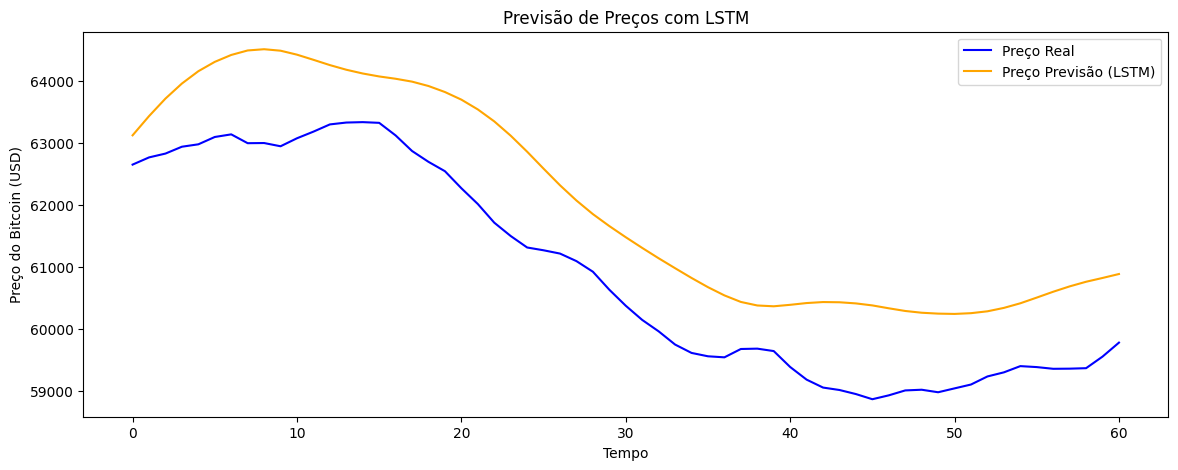

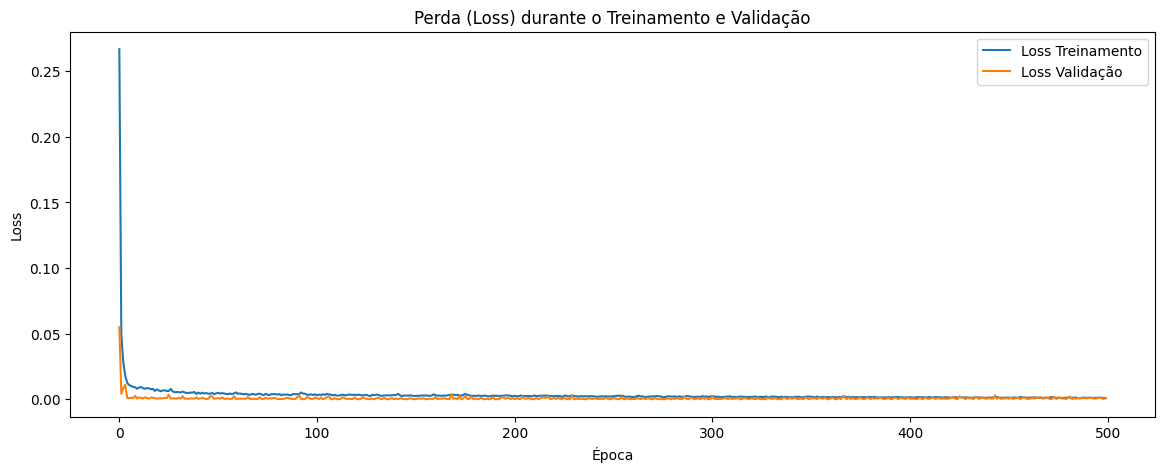

In [8]:
# Calcular métricas
mse_lstm = mean_squared_error(real_prices, predicted_prices)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(real_prices, predicted_prices)

print(f'Mean Squared Error: {mse_lstm}')
print(f'Root Mean Squared Error: {rmse_lstm}')
print(f'R² Score: {r2_lstm}')

# Visualização gráfica das previsões vs valores reais
plt.figure(figsize=(14, 5))
plt.plot(real_prices, color='blue', label='Preço Real')
plt.plot(predicted_prices, color='orange', label='Preço Previsão (LSTM)')
plt.title('Previsão de Preços com LSTM')
plt.xlabel('Tempo')
plt.ylabel('Preço do Bitcoin (USD)')
plt.legend()
plt.show()

# Visualização da perda (loss) do treinamento e validação
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Perda (Loss) durante o Treinamento e Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Conclusões

Sem dúvidas o melhor modelo testado.

O R2, apesar de negativo, está próximo o suficiente de 1, o que significa que o ajuste dos dados foi muito bom. Além disso, o erro não está tão alto comparado aos outros modelos, e os gráficos ilustram bem que a estimativa que o modelo devolve foi a que melhor representou os dados reais até agora.

## Comparação entre os modelos

C:\Users\Inteli\AppData\Local\Temp\ipykernel_27332\1253337228.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics, x='Modelo', y='MSE', palette='viridis')


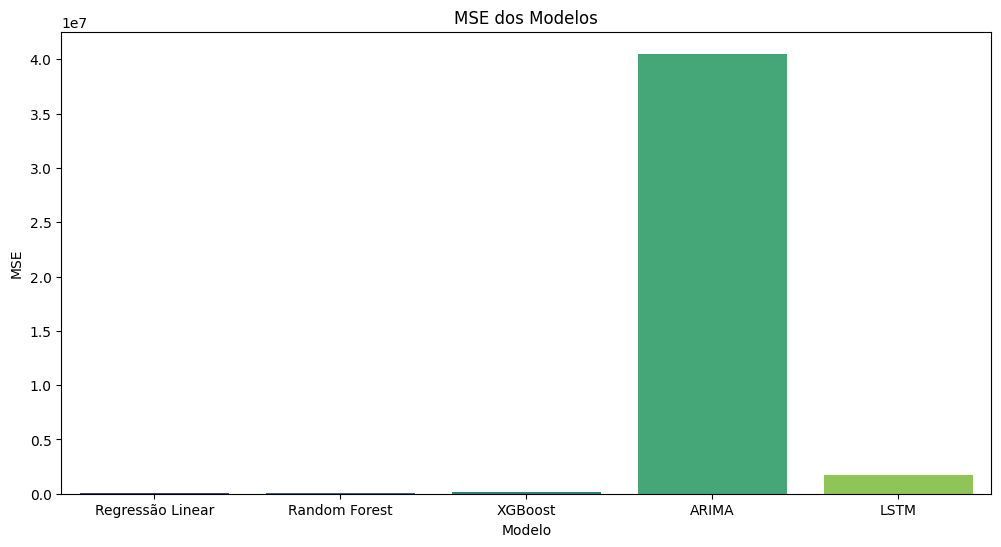

C:\Users\Inteli\AppData\Local\Temp\ipykernel_27332\1253337228.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics, x='Modelo', y='RMSE', palette='viridis')


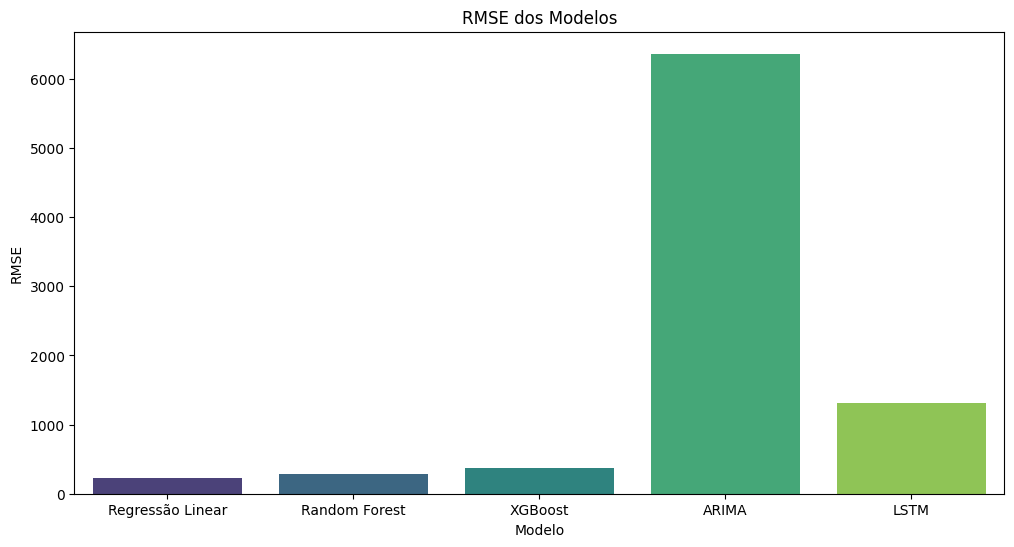

C:\Users\Inteli\AppData\Local\Temp\ipykernel_27332\1253337228.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics, x='Modelo', y='R²', palette='viridis')


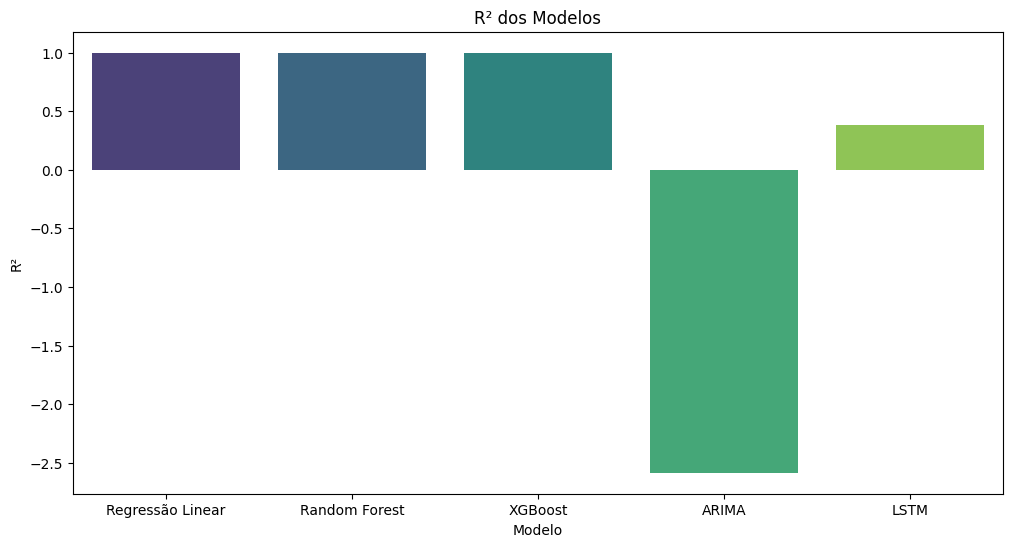

In [157]:
# Gráfico de barras com as métricas de avaliação

metrics = {'Modelo': ['Regressão Linear', 'Random Forest', 'XGBoost', 'ARIMA', 'LSTM'],
              'MSE': [mse_linear, mse_forest, mse_boost, mse_arima, mse_lstm],
              'RMSE': [rmse_linear, rmse_forest, rmse_boost, rmse_arima, rmse_lstm],
              'R²': [r2_linear, r2_forest, r2_boost, r2_arima, r2_lstm]}
df_metrics = pd.DataFrame(metrics)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_metrics, x='Modelo', y='MSE', palette='viridis')
plt.title('MSE dos Modelos')
plt.ylabel('MSE')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_metrics, x='Modelo', y='RMSE', palette='viridis')
plt.title('RMSE dos Modelos')
plt.ylabel('RMSE')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_metrics, x='Modelo', y='R²', palette='viridis')
plt.title('R² dos Modelos')
plt.ylabel('R²')
plt.show()

## Decisão final : Escolha do modelo

Após analisar todos os modelos, fica claro que houveram 3 que erraram muito pouco, como o Linear Regression, o Random Forest e o XGBoost. Porém, todos esses modelos apresentaram um R2 maior que 99%, o que significa que esses modelos estão extremamente ajustados aos dados de treino, o que caracteriza um overfitting.

O modelo ARIMA foi de longe o de pior desempenho, pois ele simplesmente não acertou uma (risos).

Dessa forma, o modelo escolhido foi o LSTM, que apesar de ainda errar, tem um ajuste mais próximo aos valores reais, e não apresenta overfitting. Dessa forma, apesar de ele não dizer com precisão qual será o valor do Bitcoin, ele já consegue acertar se o mesmo irá valorizar ou decair, o que o já torna útil para tomar decisões estratégicas.

In [14]:
# Exportando o modelo LSTM

model.save('../backend/models/model_lstm.h5')